In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re, math
import pandas as pd
import numpy as np
import datetime


In [7]:
Tesla_df = pd.read_csv('/Users/deepanshu/Documents/Semester 3/Bloomberg/Dataset/tesla_dataset.csv')

Tesla_df

,Date,Last Price,Open Price,High Price,Low Price,Volume
0,5/13/2022,769.590,773.480,787.350,751.565,30716908
1,5/12/2022,728.000,701.000,759.660,680.000,46770952
2,5/11/2022,734.000,795.000,809.770,727.200,32408152
3,5/10/2022,800.040,819.310,825.360,774.250,28133876
4,5/9/2022,787.110,836.450,845.630,781.150,30270074
...,...,...,...,...,...,...
502,5/18/2020,162.726,165.556,166.944,160.776,58490512
503,5/15/2020,159.834,158.070,161.010,157.310,52592140
504,5/14/2020,160.666,156.000,160.672,152.800,68410944
505,5/13/2020,158.192,164.166,165.200,152.660,95327456


In [8]:
#Reversed the column order
Tesla_df = Tesla_df.loc[::-1].reset_index(drop=True)
Tesla_df

,Date,Last Price,Open Price,High Price,Low Price,Volume
0,5/12/2020,161.882,165.400,168.658,161.600,79534528
1,5/13/2020,158.192,164.166,165.200,152.660,95327456
2,5/14/2020,160.666,156.000,160.672,152.800,68410944
3,5/15/2020,159.834,158.070,161.010,157.310,52592140
4,5/18/2020,162.726,165.556,166.944,160.776,58490512
...,...,...,...,...,...,...
502,5/9/2022,787.110,836.450,845.630,781.150,30270074
503,5/10/2022,800.040,819.310,825.360,774.250,28133876
504,5/11/2022,734.000,795.000,809.770,727.200,32408152
505,5/12/2022,728.000,701.000,759.660,680.000,46770952


In [13]:
#Tesla
Tesla_df['Date'] = pd.to_datetime(Tesla_df['Date']) 
print(np.min(Tesla_df['Date'] ),np.max(Tesla_df['Date']))
Tesla_df.head()



2020-05-12 00:00:00 2022-05-13 00:00:00


,Date,Last Price,Open Price,High Price,Low Price,Volume
0,2020-05-12,161.882,165.400,168.658,161.600,79534528
1,2020-05-13,158.192,164.166,165.200,152.660,95327456
2,2020-05-14,160.666,156.000,160.672,152.800,68410944
3,2020-05-15,159.834,158.070,161.010,157.310,52592140
4,2020-05-18,162.726,165.556,166.944,160.776,58490512


,Date,Last Price,Open Price,High Price,Low Price,Volume
502,2022-05-09,787.11,836.45,845.63,781.150,30270074
503,2022-05-10,800.04,819.31,825.36,774.250,28133876
504,2022-05-11,734.00,795.00,809.77,727.200,32408152
505,2022-05-12,728.00,701.00,759.66,680.000,46770952
506,2022-05-13,769.59,773.48,787.35,751.565,30716908


,Date,Last Price,Open Price,High Price,Low Price,Volume
0,2020-05-12,161.882,165.400,168.658,161.600,79534528
1,2020-05-13,158.192,164.166,165.200,152.660,95327456
2,2020-05-14,160.666,156.000,160.672,152.800,68410944
3,2020-05-15,159.834,158.070,161.010,157.310,52592140
4,2020-05-18,162.726,165.556,166.944,160.776,58490512


In [18]:
#S&p 500 data
Snp500_df = pd.read_csv('/Users/deepanshu/Documents/Semester 3/Bloomberg/Dataset/S&p_500.csv')
Snp500_df

,Date,Last Price,Volume,SMAVG (15),Unnamed: 4
0,5/13/22,4023.89,655747840,746401088,NaN
1,5/12/22,3930.08,826698816,748801408,NaN
2,5/11/22,3935.18,744675392,738255424,NaN
3,5/10/22,4001.05,790371072,728639424,NaN
4,5/9/22,3991.24,804816704,714750720,NaN
...,...,...,...,...,...
502,5/18/20,2953.91,800533504,716407232,NaN
503,5/15/20,2863.70,1024342720,703758656,NaN
504,5/14/20,2852.50,706517120,683379648,NaN
505,5/13/20,2820.00,761340544,681457600,NaN


In [19]:
#Reversed the column order

Snp500_df = Snp500_df.loc[::-1].reset_index(drop=True)
Snp500_df

,Date,Last Price,Volume,SMAVG (15),Unnamed: 4
0,5/12/20,2870.12,595423616,675293120,NaN
1,5/13/20,2820.00,761340544,681457600,NaN
2,5/14/20,2852.50,706517120,683379648,NaN
3,5/15/20,2863.70,1024342720,703758656,NaN
4,5/18/20,2953.91,800533504,716407232,NaN
...,...,...,...,...,...
502,5/9/22,3991.24,804816704,714750720,NaN
503,5/10/22,4001.05,790371072,728639424,NaN
504,5/11/22,3935.18,744675392,738255424,NaN
505,5/12/22,3930.08,826698816,748801408,NaN


In [21]:
#S&P 500
Snp500_df['Date'] = pd.to_datetime(Snp500_df['Date']) 
print(np.min(Snp500_df['Date'] ),np.max(Snp500_df['Date']))
Snp500_df

2020-05-12 00:00:00 2022-05-13 00:00:00


,Date,Last Price,Volume,SMAVG (15),Unnamed: 4
0,2020-05-12,2870.12,595423616,675293120,NaN
1,2020-05-13,2820.00,761340544,681457600,NaN
2,2020-05-14,2852.50,706517120,683379648,NaN
3,2020-05-15,2863.70,1024342720,703758656,NaN
4,2020-05-18,2953.91,800533504,716407232,NaN
...,...,...,...,...,...
502,2022-05-09,3991.24,804816704,714750720,NaN
503,2022-05-10,4001.05,790371072,728639424,NaN
504,2022-05-11,3935.18,744675392,738255424,NaN
505,2022-05-12,3930.08,826698816,748801408,NaN


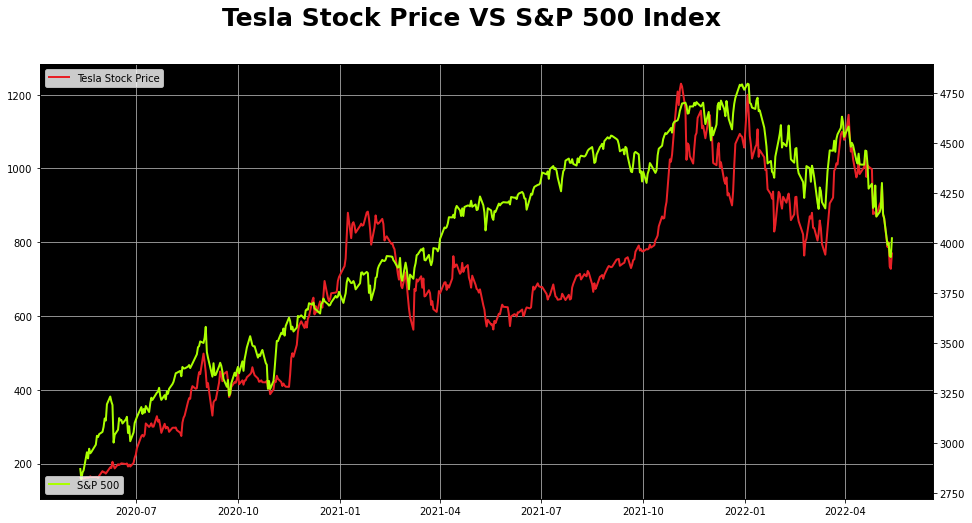

In [35]:
#Visualize
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_facecolor('xkcd:black')
plt.plot(Tesla_df['Date'], 
         Tesla_df['Last Price'],
         color='#e82127', 
         linewidth=2,
         label='Tesla Stock Price')
plt.grid()
plt.legend(loc='upper left')
fig.suptitle('Tesla Stock Price VS S&P 500 Index', fontsize=25, fontweight='bold')

ax.twinx()
plt.plot(Snp500_df['Date'],  Snp500_df['Last Price'], 
         color='#AAFF00', 
         linewidth=2,
         label='S&P 500')
plt.legend(loc='lower left') 

Text(0.5, 0.98, 'Tesla Stock Price VS S&P 500 Index')

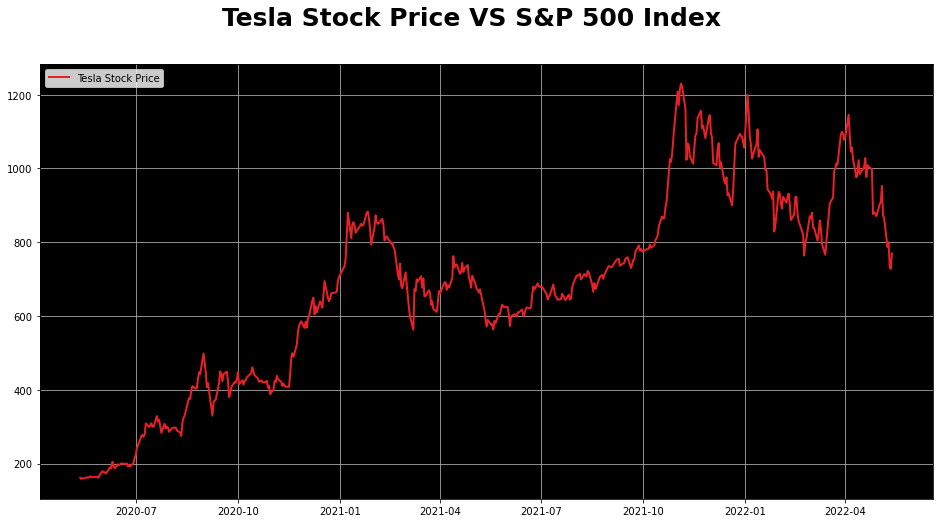

In [36]:
#Visualize Tesla stock Price
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_facecolor('xkcd:black')
plt.plot(Tesla_df['Date'], 
         Tesla_df['Last Price'],
         color='#e82127', 
         linewidth=2,
         label='Tesla Stock Price')
plt.grid()
plt.legend(loc='upper left')
fig.suptitle('Tesla Stock Price VS S&P 500 Index', fontsize=25, fontweight='bold')

Text(0.5, 0.98, 'S&P 500 Index')

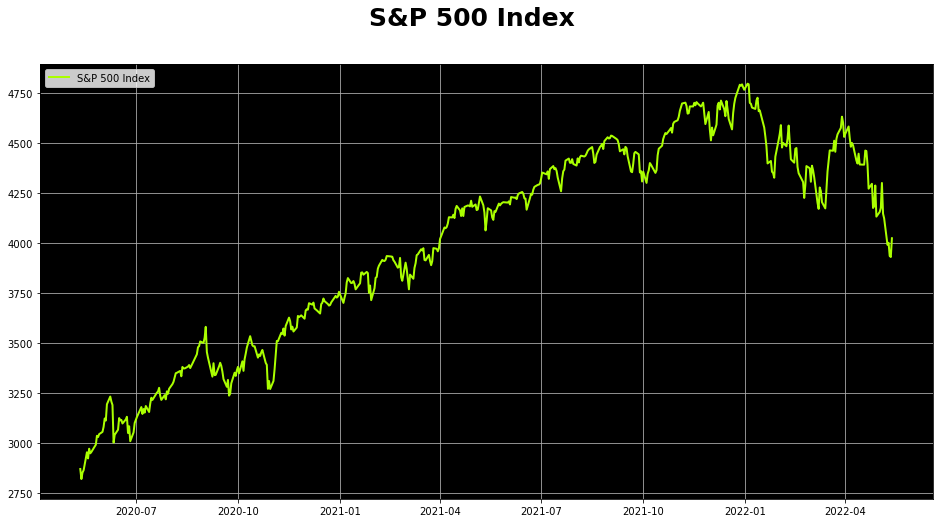

In [37]:
#Visualize S&P 500 Index
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_facecolor('xkcd:black')
plt.plot(Snp500_df['Date'], 
         Snp500_df['Last Price'],
         color='#AAFF00', 
         linewidth=2,
         label='S&P 500 Index')
plt.grid()
plt.legend(loc='upper left')
fig.suptitle('S&P 500 Index', fontsize=25, fontweight='bold')